In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library

import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt.data
import os
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow

# Split Data

Tidak perlu di-run ketika sudah ada folder Splitted

In [ ]:
dataset = "/content/drive/MyDrive/Project PCD/Dataset"

os.chdir(dataset)
os.getcwd()

'/content/drive/MyDrive/Project PCD/Dataset'

In [ ]:
# Read gambar

fresh = os.path.join(dataset, 'Fresh')
spoiled = os.path.join(dataset, 'Spoiled')

In [ ]:
# Hitung jumlah file

print('total training fresh meat images:', len(os.listdir(fresh)))
print('total training spoiled meat images:', len(os.listdir(spoiled)))

total training fresh meat images: 948
total training spoiled meat images: 948


In [ ]:
!pip install split-folders

In [ ]:
# Split folder menjadi train dan test

import splitfolders

input_folder = dataset
output = '/content/drive/MyDrive/Project PCD/Splitted'

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1))

# Eksplorasi

In [ ]:
# Read gambar
output = '/content/drive/MyDrive/Project PCD/Splitted'
os.chdir(output)
os.getcwd()

train_dir = os.path.join(output, 'train')
test_dir = os.path.join(output, 'test')

# Training fresh
train_fresh = os.path.join(train_dir, 'Fresh')
# Training spoiled
train_spoiled = os.path.join(train_dir, 'Spoiled')

# Testing fresh
test_fresh = os.path.join(test_dir, 'Fresh')
# Test spoiled
test_spoiled = os.path.join(test_dir, 'Spoiled')

In [ ]:
# Cek nama file

train_fresh_fnames = os.listdir(train_fresh)
print(train_fresh_fnames[:10])

train_spoiled_fnames = os.listdir(train_spoiled)
train_spoiled_fnames.sort()
print(train_spoiled_fnames[:10])

['test_20171017_112721D.jpg', 'test_20171016_150521D.jpg', 'test_20171017_161921D.jpg', 'test_20171016_134321D.jpg', 'test_20171017_071921D.jpg', 'test_20171017_182321D.jpg', 'test_20171016_184321D.jpg', 'test_20171016_163521D.jpg', 'test_20171016_164321D.jpg', 'test_20171016_205121D.jpg']
['test_20171017_190121D.jpg', 'test_20171017_190321D.jpg', 'test_20171017_190521D.jpg', 'test_20171017_190921D.jpg', 'test_20171017_191121D.jpg', 'test_20171017_191521D.jpg', 'test_20171017_191721D.jpg', 'test_20171017_191921D.jpg', 'test_20171017_192121D.jpg', 'test_20171017_192521D.jpg']


In [ ]:
# Menghitung banyak file input

print('total training fresh meat images:', len(os.listdir(train_fresh)))
print('total training spoiled meat images:', len(os.listdir(train_spoiled)))
print('total testing fresh meat images:', len(os.listdir(test_fresh)))
print('total testing spoiled meat images:', len(os.listdir(test_spoiled)))

total training fresh meat images: 758
total training spoiled meat images: 758
total testing fresh meat images: 191
total testing spoiled meat images: 191


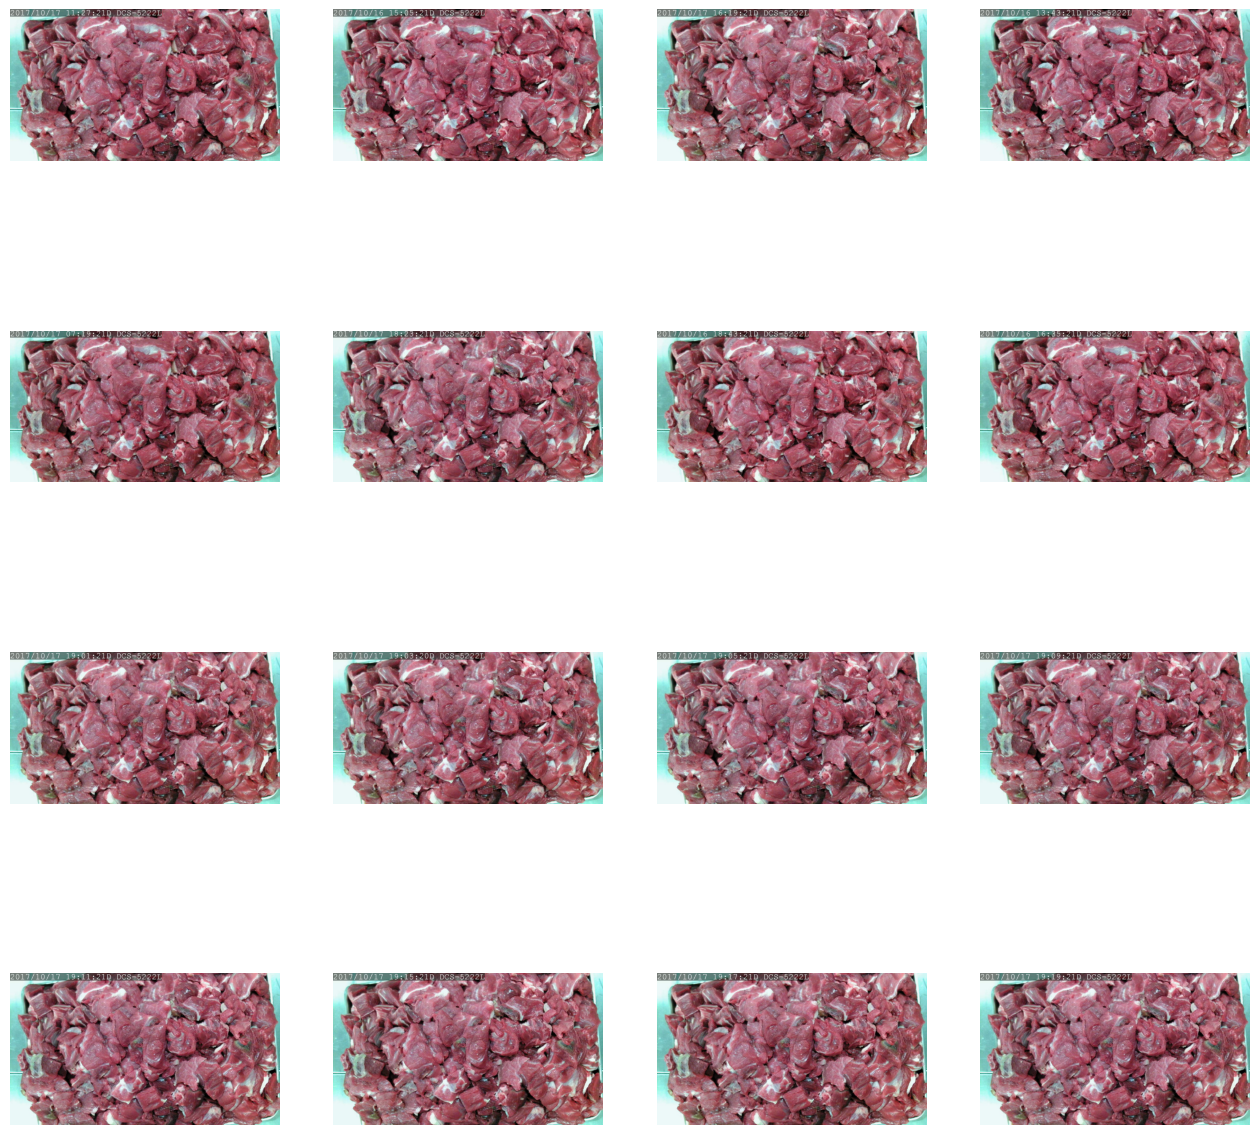

In [ ]:
# Menampilkan sampel

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_meat_pix = [os.path.join(train_fresh, fname)
                for fname in train_fresh_fnames[pic_index-8:pic_index]]
next_meat_spoiled_pix = [os.path.join(train_spoiled, fname)
                for fname in train_spoiled_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_meat_pix+next_meat_spoiled_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# CNN

In [ ]:
# DEEP LEARNING ARCHITECTURE

from tensorflow.keras import layers
from tensorflow.keras import Model

# Input berdimensi 150x150px dengan 3 channel untuk Blue, Green, dan Red
img_input = layers.Input(shape=(150, 150, 3))

# Convolution layer I: 16 filter berukuran 3x3
x = layers.Conv2D(16, 3, activation='relu')(img_input)
# Pooling layer: Max-pooling layer 2x2
x = layers.MaxPooling2D(2)(x)

# Convolution layer II: 32 filter berukuran 3x3
x = layers.Conv2D(32, 3, activation='relu')(x)
# Pooling layer: Max-pooling layer 2x2
x = layers.MaxPooling2D(2)(x)

# Convolution layer III: 64 filter berukuran 3x3
x = layers.Conv2D(64, 3, activation='relu')(x)
# Pooling layer: Max-pooling layer 2x2
x = layers.MaxPooling2D(2)(x)

# Fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

# Menggabungkan layer input dan output
model = Model(img_input, output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
# IMAGE DATA GENERATOR

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 1516 images belonging to 2 classes.
Found 382 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=47,  # 1516 images = batch_size * steps = 32*47
      epochs=15,
      validation_data=validation_generator,
      validation_steps=11,  # 382 images = batch_size * steps = 32*11
      verbose=2)

<ipython-input-11-4519621b9de3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
47/47 - 175s - loss: 0.6462 - acc: 0.7729 - val_loss: 0.1641 - val_acc: 0.9460 - 175s/epoch - 4s/step
Epoch 2/15
47/47 - 74s - loss: 0.1492 - acc: 0.9387 - val_loss: 0.0801 - val_acc: 0.9489 - 74s/epoch - 2s/step
Epoch 3/15
47/47 - 72s - loss: 0.0777 - acc: 0.9704 - val_loss: 0.1316 - val_acc: 0.9318 - 72s/epoch - 2s/step
Epoch 4/15
47/47 - 71s - loss: 0.0629 - acc: 0.9744 - val_loss: 0.0704 - val_acc: 0.9545 - 71s/epoch - 2s/step
Epoch 5/15
47/47 - 73s - loss: 0.0394 - acc: 0.9852 - val_loss: 0.0307 - val_acc: 0.9858 - 73s/epoch - 2s/step
Epoch 6/15
47/47 - 71s - loss: 0.0380 - acc: 0.9825 - val_loss: 0.0222 - val_acc: 0.9943 - 71s/epoch - 2s/step
Epoch 7/15
47/47 - 72s - loss: 0.0234 - acc: 0.9879 - val_loss: 0.0189 - val_acc: 0.9972 - 72s/epoch - 2s/step
Epoch 8/15
47/47 - 71s - loss: 0.0226 - acc: 0.9906 - val_loss: 0.0259 - val_acc: 0.9858 - 71s/epoch - 2s/step
Epoch 9/15
47/47 - 71s - loss: 0.0198 - acc: 0.9933 - val_loss: 0.0379 - val_acc: 0.9801 - 71s/epoch - 2s/step

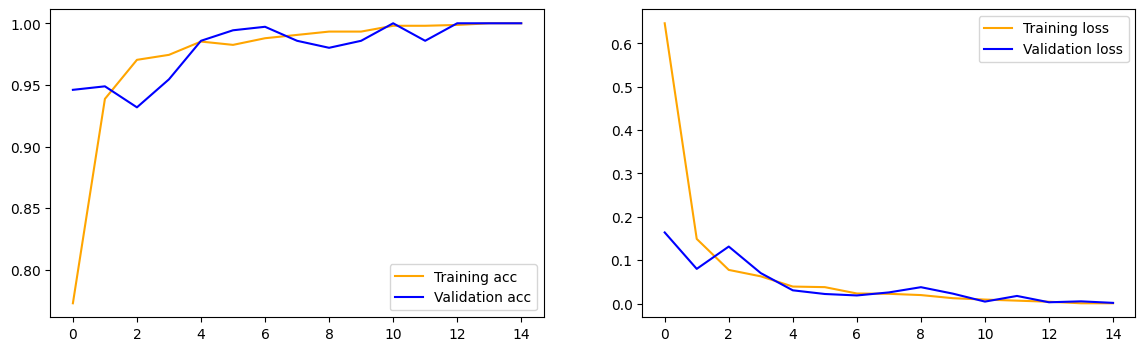

In [ ]:
# VISUALISASI AKURASI PREDIKSI

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

f, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plotting accuracy
axes[0].plot(epochs, acc, 'orange', label='Training acc')
axes[0].plot(epochs, val_acc, 'blue', label='Validation acc')
axes[0].legend()

# Plotting loss
axes[1].plot(epochs, loss, 'orange', label='Training loss')
axes[1].plot(epochs, val_loss, 'blue', label='Validation loss')
axes[1].yaxis.set_label_position("right")
axes[1].legend()

plt.show()

In [ ]:
scores = model.evaluate(validation_generator)
print("Precision =", scores[1])
print("Loss =", scores[0])

12/12 [==============================] - 9s 700ms/step - loss: 0.0016 - acc: 1.0000
Precision = 1.0
Loss = 0.001636424334719777


/content/drive/MyDrive/Project PCD/Splitted/train/Fresh/test_20171017_013121D.jpg
1/1 [==============================] - 0s 133ms/step


<ipython-input-14-00099b79519b>:37: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


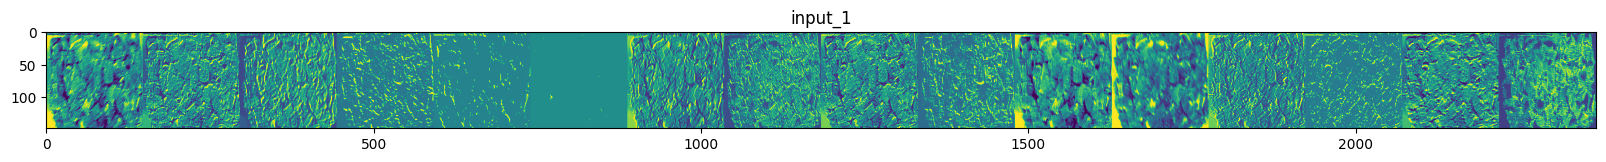

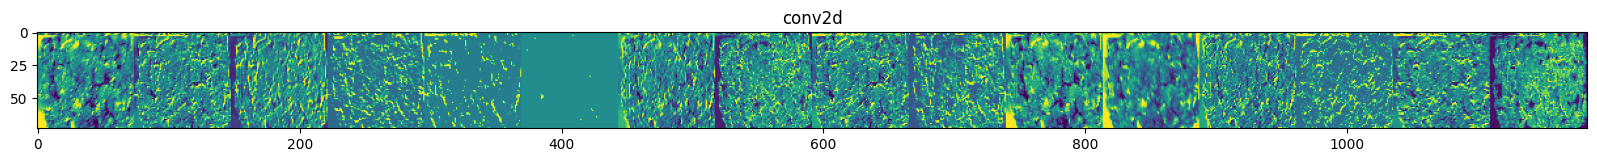

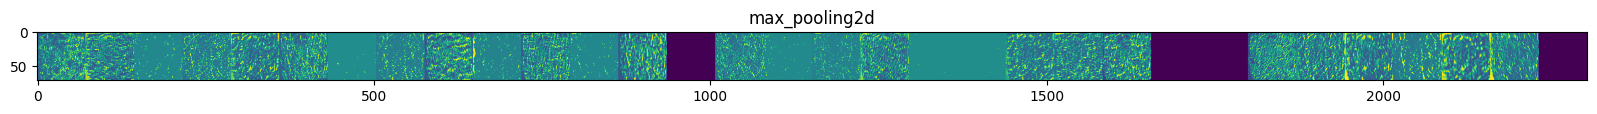

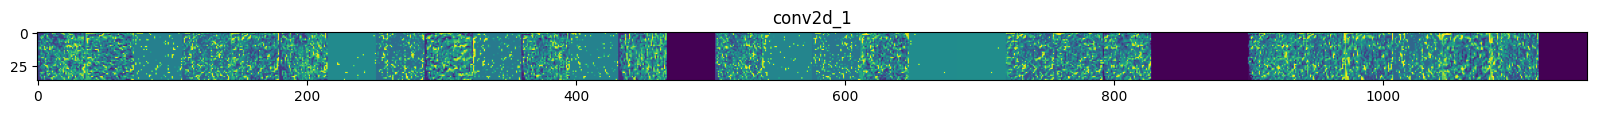

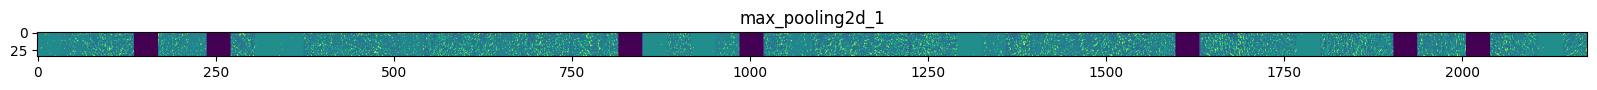

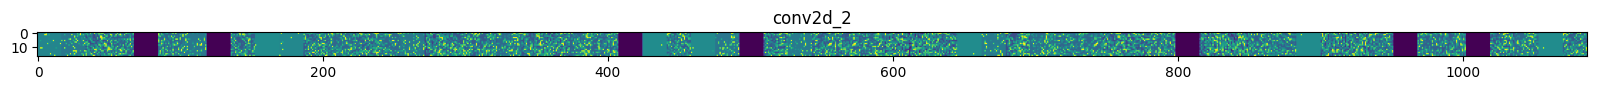

In [ ]:
# DISPLAY FEATURE MAPS

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Mendefinisikan model untuk visualisasi
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Memilih 1 sampel random
fresh_img_files = [os.path.join(train_fresh, f) for f in train_fresh_fnames]
spoiled_img_files = [os.path.join(train_spoiled, f) for f in train_spoiled_fnames]
img_path = random.choice(fresh_img_files + spoiled_img_files)
print(img_path)

img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Rescale 1/255
x /= 255

# Memasukkan image ke model
successive_feature_maps = visualization_model.predict(x)


layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Confusion Matrix

Found 382 images belonging to 2 classes.
  3/382 [..............................] - ETA: 9s 

<ipython-input-18-2ea54d47752e>:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator, len(test_generator), verbose=1)


382/382 [==============================] - 11s 30ms/step


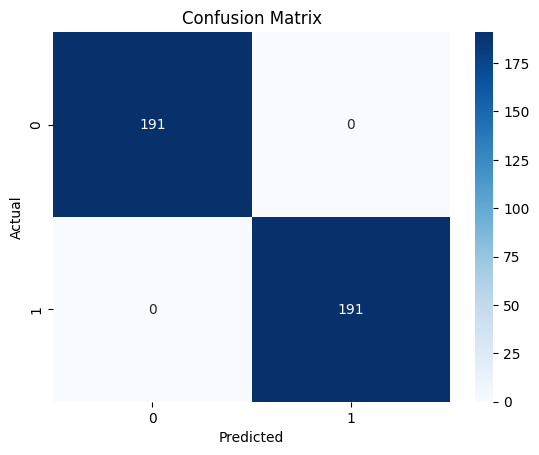

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediksi data uji
test_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode='binary',
        shuffle=False)

y_true = test_generator.classes
y_pred = model.predict_generator(test_generator, len(test_generator), verbose=1)
y_pred = y_pred > 0.5  # Menggunakan threshold 0.5 untuk mengubah nilai probabilitas menjadi kelas biner

# Membuat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Testing

In [ ]:
from keras.utils import load_img, img_to_array
import numpy as np

#img_path='/content/drive/MyDrive/Project PCD/Splitted/train/Fresh/test_20171016_104321D.jpg' # fresh ->[[0.]]
img_path='/content/drive/MyDrive/Project PCD/Splitted/train/Spoiled/test_20171017_190321D.jpg' # spoiled ->[[1.]]

img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

preds=model.predict(x)
print(preds)

1/1 [==============================] - 0s 119ms/step
[[1.]]


In [ ]:
from sklearn.metrics import confusion_matrix

test_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        shuffle=False)

y_pred = model.predict_generator(test_generator)
y_pred = np.round(y_pred).flatten()  # Convert probabilities to binary predictions

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

print(cm)

Found 382 images belonging to 2 classes.


<ipython-input-17-cea71645dbe5>:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator)


[[191   0]
 [  0 191]]
